In [1]:
import sys

print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


### 이진분류

In [2]:
import pandas as pd
import numpy as np

from sklearn import svm


In [3]:
# 학습함수 => fit
# 예측함수 => predict

clf = svm.SVC()
clf.fit([
    [0,0], #문제1
    [1,0], #문제2
    [0,1], #문제3
    [1,1] #문제4
], [0,1,1,0]) # 답1,2,3,4


# clf.predict(예측할 데이터셋)
results = clf.predict([
    [0,0],
    [1,0]
])

print(results)

[0 1]


C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [4]:
xor_data = [
    [0, 0, 0], # x1,x2,result 
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

data = []
label = []

# dataset 만들기
for row in xor_data:
    p = row[0] # 첫번째 list의 x1 추출
    q = row[1] # 두번째 list의 x2 추출
    r = row[2] # 세번째 list의 result 추출
    data.append([p,q]) # 이중리스트 형태로
    label.append(r)
    
clf = svm.SVC()
clf.fit(data,label) # 학습

pre = clf.predict(data) # 
print("예측결과",pre)

ok=0; total=0

# 결과확인
for idx,answer in enumerate(label):
    p = pre[idx]
    if p == answer: ok+=1
    total +=1

print("정답률",ok, "/", total, "=", ok/total)
            

예측결과 [0 1 1 0]
정답률 4 / 4 = 1.0


C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [5]:
from sklearn import svm,metrics

xor_input = [
    [0, 0, 0], # x1,x2,result 
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]


xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.loc[:,0:1] # 모든행과 첫번째 두번째열 추출
xor_label = xor_df.loc[:,2] # 모든행과 3번째열 추출

clf = svm.SVC()
clf.fit(xor_data,xor_label) # 학습시키기
pre = clf.predict(xor_data)

# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label,pre) # 정답과 예측값 비교
print("정답률", ac_score)

정답률 1.0


C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 다중분류

In [7]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split

iris = pd.read_csv("./../Data/iris.csv")

In [9]:

# 필요한 열 추출
csv_data = iris[["SepalLength","SepalWidth","PetalWidth"]]
csv_label = iris["Name"]

# 학습전용,테스트 전용으로 데이트 나누기
# 8 : 2의 비율로 나누어줌
train_data, test_data, train_label, test_label = train_test_split(csv_data,csv_label)

# 데이터 학습시키고 예측
clf = svm.SVC()
clf.fit(train_data,train_label)
pre = clf.predict(test_data)

# 학습시키지 않았던 데이터로 정답률을 구하기 위해 학습전용,테스트전용으로 나눔

# 정답률 구하기
ac_score = metrics.accuracy_score(test_label,pre)
print("정답률 = ", ac_score)

정답률 =  0.9473684210526315


C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### svm 활용 irst 데이터 분석

In [6]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [8]:
iris = datasets.load_iris()

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib

def plot_decision_region(x,y,classifier,test_idx=None,resolution=0.02,title=''):
    markers = ('s','x','o','^','v')
    colors = ('r','b','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # decision surface 그리기
    x1_min,x1_max = x[:,0].min()-1, x[:,0].max() + 1
    x2_min,x2_max = x[:,1].min()-1, x[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))

    plt.contourf(xx,yy,Z,alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    x_test, y_test = x[test_idx, :],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0], y=x[y==cl,1], c=cmap(idx), marker=markers[idx],label=cl)
    
    if test_idx:
        x_test,y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:,0],x_test[:,1], c="", linewidth=1, marker='o', s=80, label="테스트셋")
    plt.xlabel("표준화 된 꽃잎 길이")
    plt.xlabel("표준화 된 꽃잎 너비")
    plt.legend(loc=2)
    plt.title(title)
    plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


총 테스트 개수:45, 총 오류개수:1
정확도:0.977778


C:\Users\Playdata\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


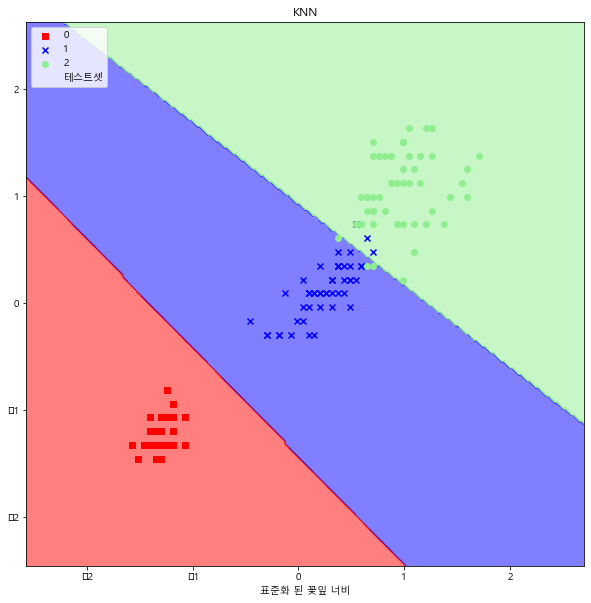

In [10]:
iris = datasets.load_iris()
# iris

x = iris.data[:,[2,3]]
y = iris.target # 답

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std  = sc.transform(x_test)


# n_neighbors => 이웃개수 설정
# minkowski => 유클리드 거리와 맨하튼 거리를 일반화한것 (p=1 -> 맨하튼거리, p=2 -> 유클리드 거리)
ml = SVC(kernel='linear', C=1.0, random_state=0)

ml.fit(x_train_std, y_train)
y_pred = ml.predict(x_test_std)
print("총 테스트 개수:%d, 총 오류개수:%d" %(len(y_test),(y_test != y_pred).sum()))
print("정확도:%2f" %accuracy_score(y_test,y_pred))

x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(x=x_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title="KNN")